In [8]:
import torch
from torchvision import datasets, transforms
import torch.utils.data
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [9]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

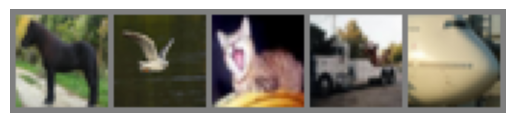

Labels: 7 2 3 9 0


In [10]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()  # Convert to numpy format
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose to (H, W, C)
    plt.axis('off')  # Turn off axis
    plt.show()  # Display the image


for i, (images, labels) in enumerate(trainloader, 0):
     imshow(torchvision.utils.make_grid(images[:5]))
     print('Labels:', ' '.join(f'{labels[j].item()}' for j in range(5))) 
     break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [11]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),  # Flatten the input
        nn.Linear(n_features, 512),  # First hidden layer
        nn.ReLU(),  # Activation function
        nn.Linear(512, 256),  # Second hidden layer
        nn.ReLU(),  # Activation function
        nn.Linear(256, 10)  # Output layer for 10 classes
    )
    return model


+ Khởi tạo hàm loss function và phương thức optimizer

In [12]:
n_features = 3 * 32 * 32
model = getModel(n_features)
lr = 0.01
optim = SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=10, bias=True)
)

+ Xây dựng hàm đánh giá model

In [13]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [14]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)



        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
     

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [2/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [3/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [4/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [5/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [6/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [7/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [8/10], Loss: 2.3039, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [9/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%
Epoch [10/10], Loss: 2.3040, Accuracy: 10.83%, Test Loss: 2.3038, Test Accuracy: 10.75%


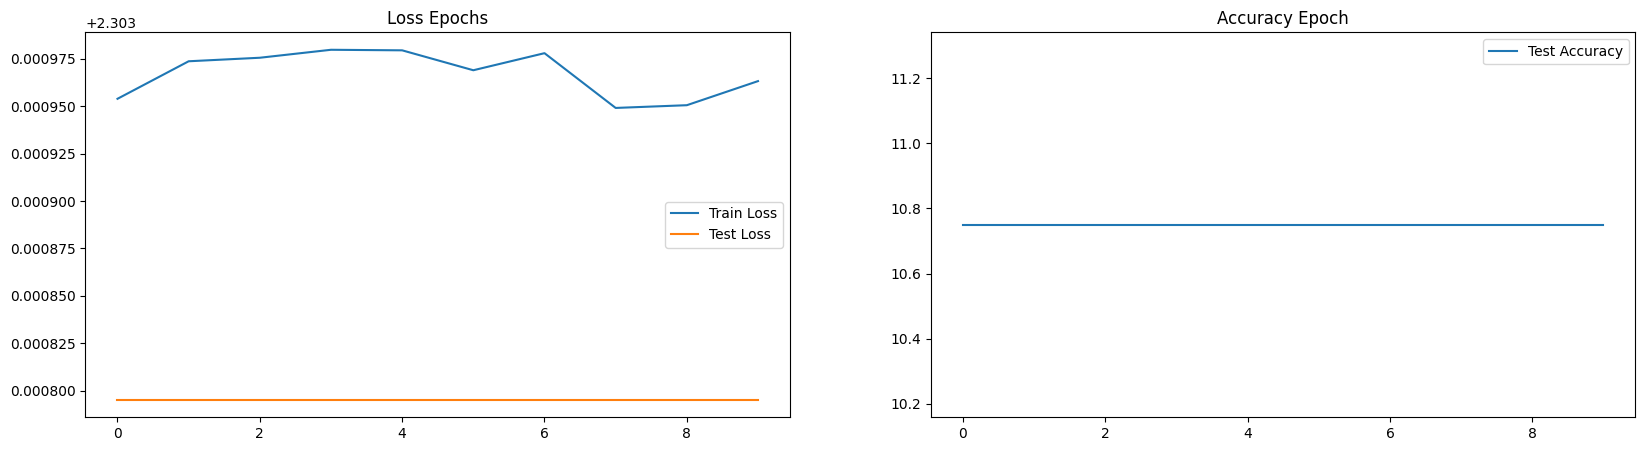

In [15]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [16]:
def zScoreScaling(tensor):
    mean = tensor.mean()
    std = tensor.std()
    return (tensor - mean) / std

In [17]:
def minMaxScaling(tensor):
    min_val = tensor.min()
    max_val = tensor.max()
    return (tensor - min_val) / (max_val - min_val)


In [18]:
class Linear:
    def __init__(self, in_features, out_features):
        self.weight = torch.randn(out_features, in_features, requires_grad=True)
        self.bias = torch.randn(out_features, requires_grad=True)

    def forward(self, x):
        return x @ self.weight.t() + self.bias

In [19]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0], 
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1.4606, -1.0954, -0.7303],
        [-0.3651,  0.0000,  0.3651],
        [ 0.7303,  1.0954,  1.4606]])
tensor([[0.0000, 0.1250, 0.2500],
        [0.3750, 0.5000, 0.6250],
        [0.7500, 0.8750, 1.0000]])


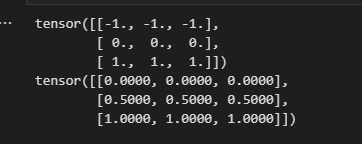

In [20]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

tensor([4.5961, 0.5806], grad_fn=<AddBackward0>)
Weight = tensor([[-1.5735,  1.2859,  1.4411],
        [-1.1724, -0.6032,  0.8339]], requires_grad=True)
Bias = tensor([-0.7256,  0.4579], requires_grad=True)
